# id by numbers
| $n_{0,{\bf r}}$ | $n^{{\bf r}'}_{\bf r} $        |  $ n^h_{{\bf r}}$|$ n^h_{0{\bf r}}$ | Linear | Connector |
|-----------------|--------------------------------|-------------------|-----------------|--------|-----------|
| $n^{\rm av}$    | $n^{\rm av}$                   | -sc  | $n^{\rm av}$ | lin1      | con1   | 
| $n^{\rm av}$    | $(n({\bf r}')+ n^{\rm av})/2 $ | sc| $n^{\rm av}$ | lin2 | con2                   |
| $n({\bf r})$    | $ (n^{\rm av}+n({\bf r})/2$    | sc| $n({\bf r})$  |lin3  | con3  |
| $n({\bf r}) $   | $ (n({\bf r}')+ n({\bf r}))/2$ | sc | $n({\bf r})$  |lin4 | con4 |
| $n({\bf r}) $   | $ n({\bf r})$                  | sc | $n({\bf r})$ |lin5 | con5|
| $n^M$           | $(n^{\rm av}+n^M)/2$           | sc |$n^M$ |lin6 | con6|
| $n^M$           | $(n({\bf r}')+n^M)/2$          | sc | $n^M$ |lin7  | con7 | 
| $n^M$           | $n^M$                          |  sc| $n^M$|lin8 | con8| 



- Linear approx: 
    $$ v_{xc}({\bf r};[n]) \approx  	v_{\rm xc}^h(n_{0,{\bf r}}) + \int d {\bf r}'   (n({\bf r}')-n_{0,{\bf r}})f_{\rm xc}(|{\bf r}-{\bf r}'|; n_{\bf r}^{{\bf r}'} ) $$ 

- connector approx if sc=1: 
$$ n^{c,{\rm approx}}_{\mathbf{r}}([n])= \frac {1}{f_{\rm xc}^h( n^h_{0{\bf r}})} \int d\mathbf{r}' n(\mathbf{r}') f_{\rm xc}(|\mathbf{r}-\mathbf{r}'|; n_{\bf r}^{{\bf r}'} ) $$


- Connector approx is sc>1: 
$$ n^{c,{\rm approx}}_{\mathbf{r}}([n])= \frac {1}{f_{\rm xc}^h( n^h_{{\bf r}})} \int d\mathbf{r}' n(\mathbf{r}') f_{\rm xc}(|\mathbf{r}-\mathbf{r}'|; n_{\bf r}^{{\bf r}'} ) $$
$$ n^h_{{\bf r}}=\frac{n_{0,{\bf r}} + n^{c,{\rm approx}}_{\mathbf{r}}([n])}{2} $$


In [1]:
from quick_analyzer import * 


# Si 

In [2]:
# update results 
#! rsync -av --delete ara:/home/me36sin/fxc_conn_article/Si/calculations/updated_version/all_tab-con/*con*.npz . 
#! rsync -av --delete ara:/home/me36sin/fxc_conn_article/Si/calculations/updated_version/all_tab-lin/*lin*.npz . 


receiving incremental file list

sent 20 bytes  received 428 bytes  298.67 bytes/sec
total size is 150,322,624  speedup is 335,541.57
receiving incremental file list

sent 20 bytes  received 263 bytes  188.67 bytes/sec
total size is 135,323,360  speedup is 478,174.42


In [3]:
si_analyse = analyzer(mat="si", qmc_file="si_qmc_dens_vxc.csv")

In [4]:
si_analyse.dict["LDA"]= {"dens": np.genfromtxt("dens_ref_lda.dat") , "direct_gap":2.55 , "vxc": np.genfromtxt("vxc_ref_lda.dat")  }

In [5]:
for i in range(1,9):
    for sc in [1,3]:  
        try: si_analyse.add_to_dict_from_npz(f"si_lin{i}_sc{sc}.npz", label=f"lin{i}")
        except: pass 
        si_analyse.add_to_dict_from_npz(f"si_con{i}_sc{sc}.npz", label=f"con{i}_sc{sc}")
    

list(si_analyse.dict.keys())

for si_con1_sc1.npz number of iterations is  50
diff on density for the last iteration: 1.15e-14
The direct gap is 2.5471 ev | QMC = 2.72 eV
for si_lin1_sc3.npz number of iterations is  50
diff on density for the last iteration: 3.55e-17
The direct gap is 2.8064 ev | QMC = 2.72 eV
for si_con1_sc3.npz number of iterations is  30
diff on density for the last iteration: 2.23e-11
The direct gap is 3.2789 ev | QMC = 2.72 eV
for si_con2_sc1.npz number of iterations is  50
diff on density for the last iteration: 1.59e-17
The direct gap is 2.3212 ev | QMC = 2.72 eV
for si_lin2_sc3.npz number of iterations is  50
diff on density for the last iteration: 1.60e-17
The direct gap is 2.6801 ev | QMC = 2.72 eV
for si_con2_sc3.npz number of iterations is  30
diff on density for the last iteration: 2.25e-11
The direct gap is 2.6836 ev | QMC = 2.72 eV
for si_con3_sc1.npz number of iterations is  50
diff on density for the last iteration: 1.78e-17
The direct gap is 2.9047 ev | QMC = 2.72 eV
for si_lin3_s

['LDA',
 'con1_sc1',
 'lin1',
 'con1_sc3',
 'con2_sc1',
 'lin2',
 'con2_sc3',
 'con3_sc1',
 'lin3',
 'con3_sc3',
 'con4_sc1',
 'lin4',
 'con4_sc3',
 'con5_sc1',
 'lin5',
 'con5_sc3',
 'con6_sc1',
 'lin6',
 'con6_sc3',
 'con7_sc1',
 'lin7',
 'con7_sc3',
 'con8_sc1',
 'lin8',
 'con8_sc3']

## Density error along the route 

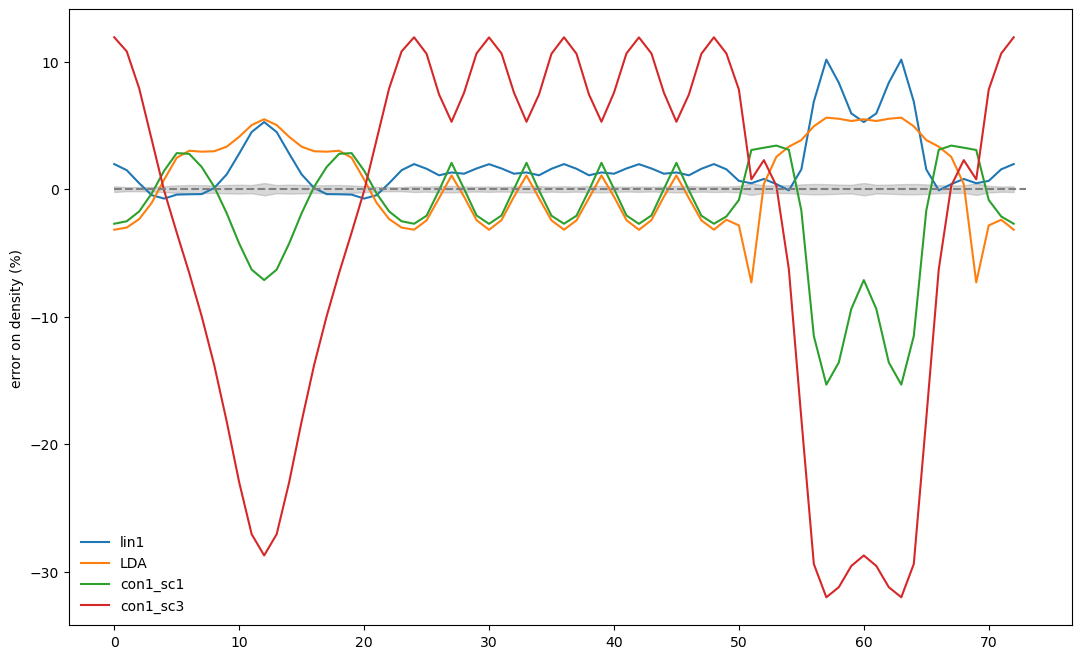

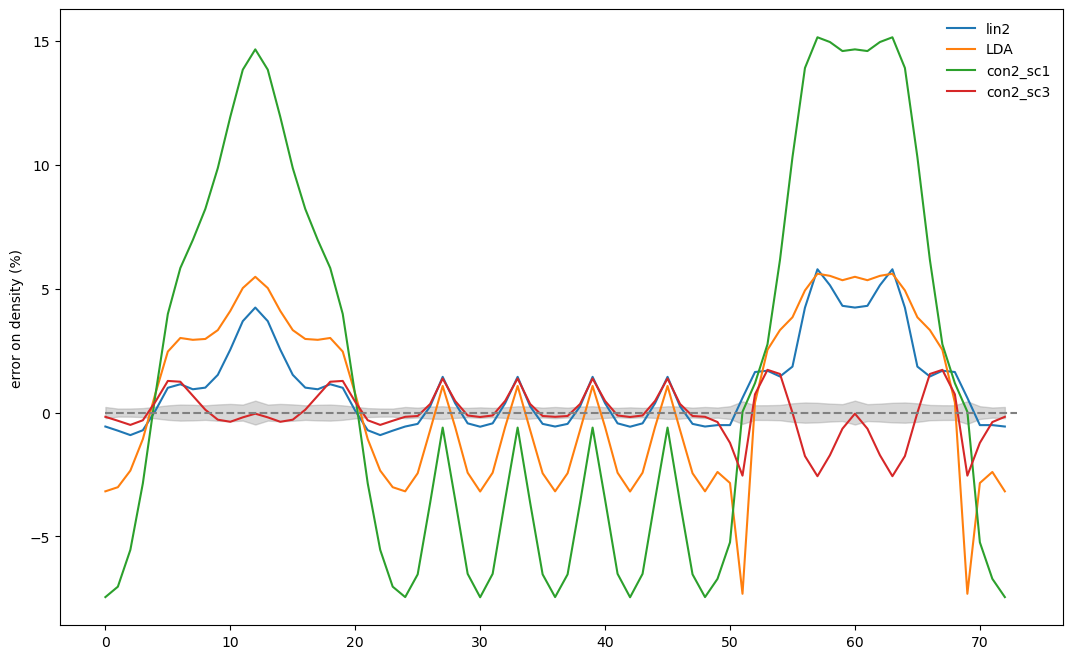

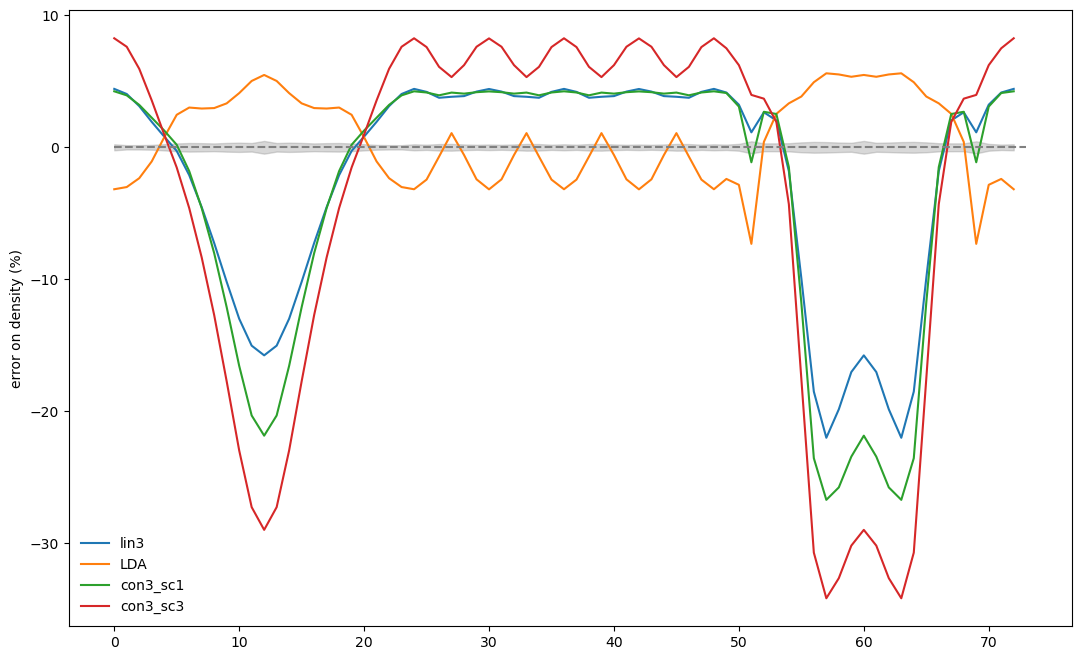

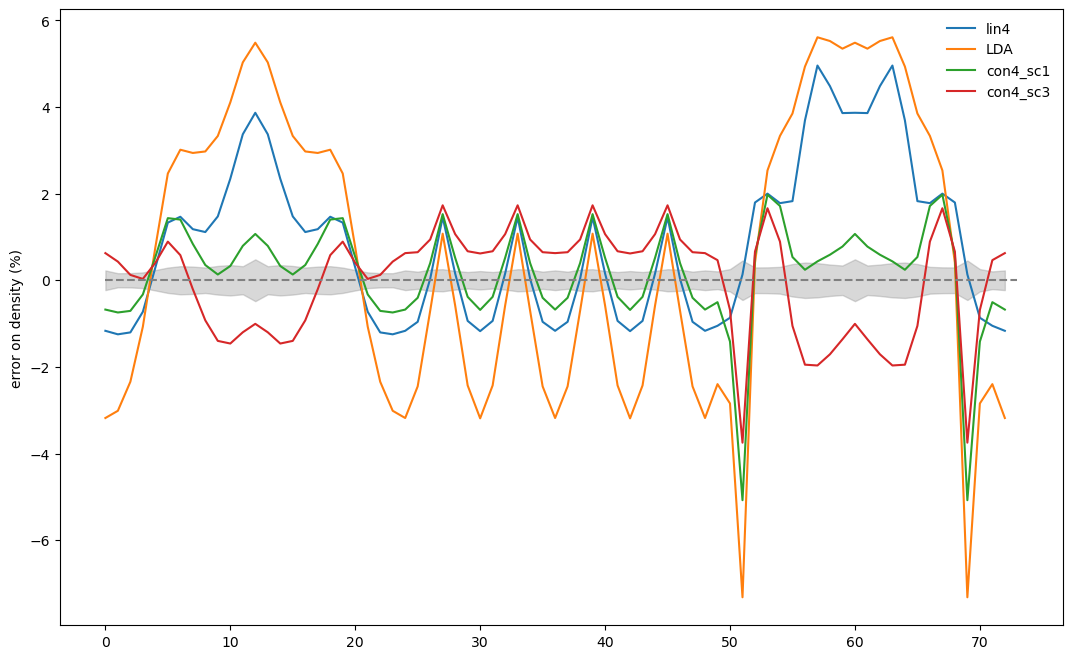

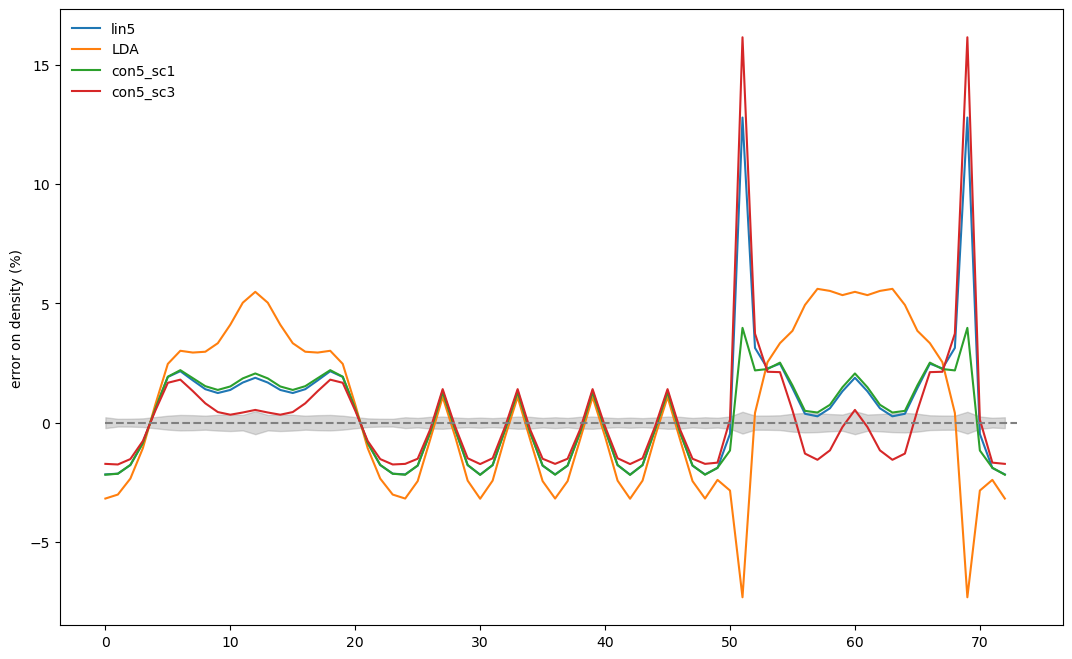

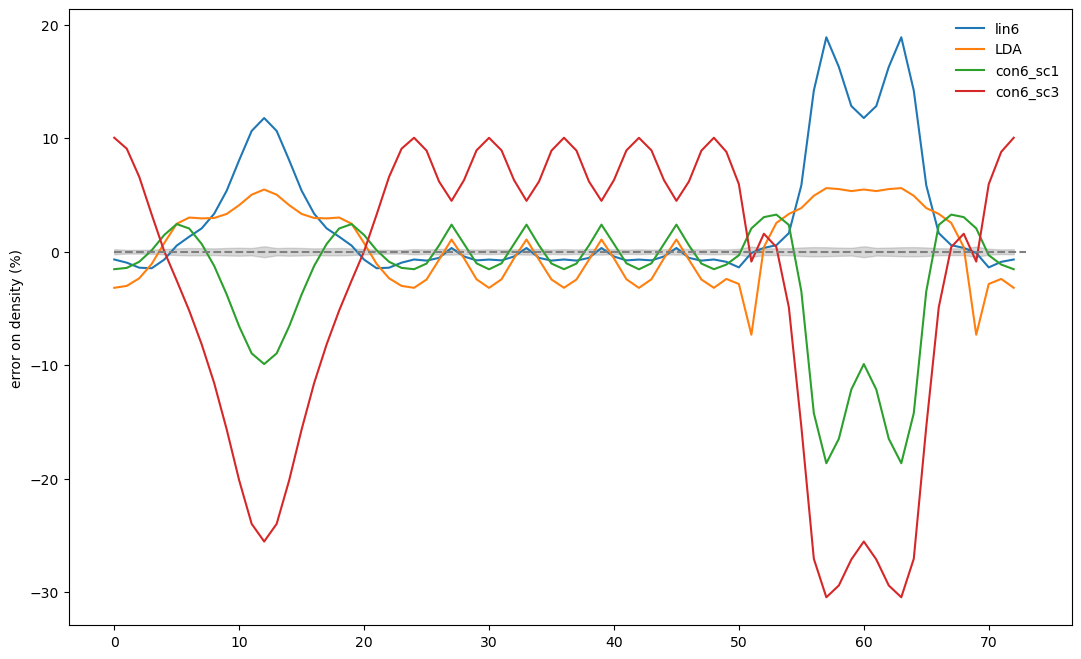

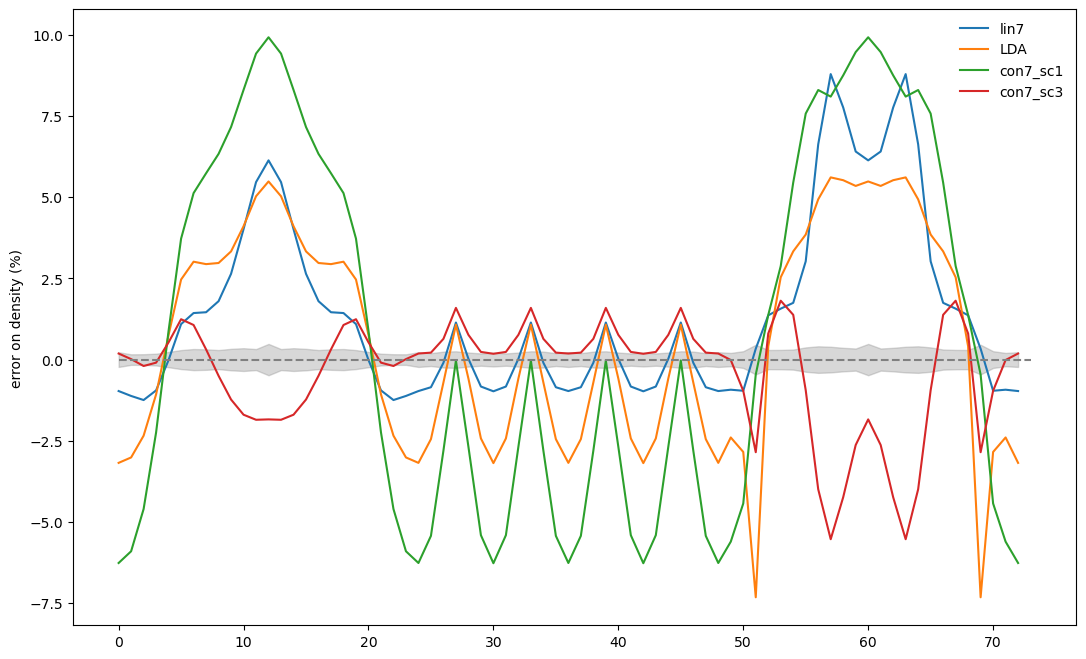

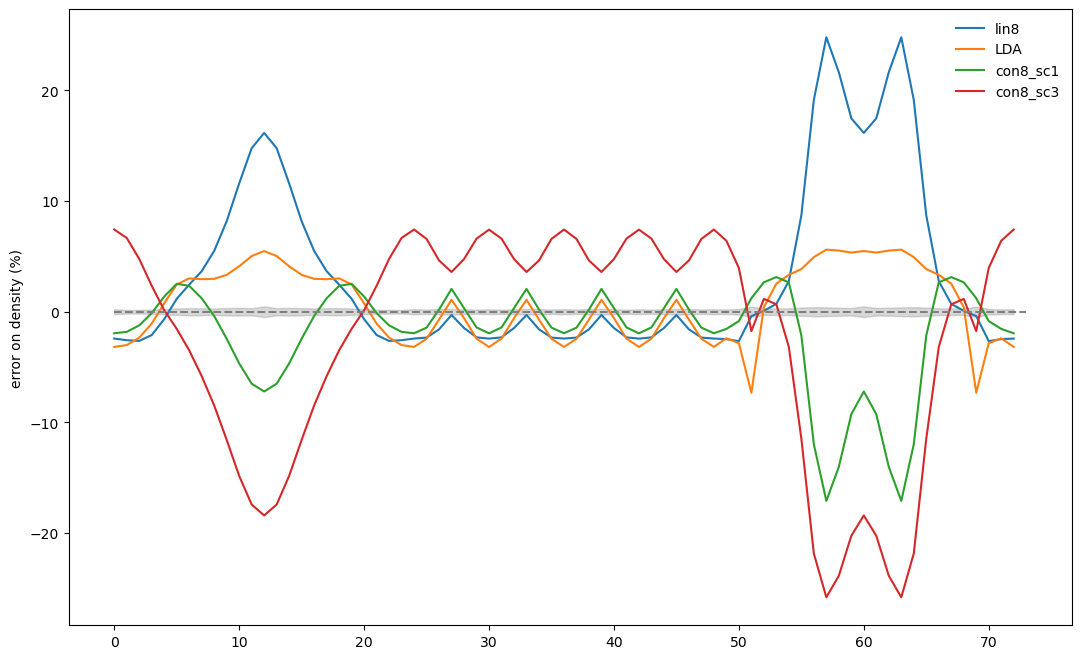

In [6]:
for i in range(1,9):
    plt.figure(figsize=(8*1.618,8))
    si_analyse.plot_diff_with_qmc([f"lin{i}","LDA", f"con{i}_sc1",f"con{i}_sc3"])

## KS direct band gap 

In [7]:
si_analyse.get_stat() 
###
##
si_analyse.dens_vxc_error_data.loc[:,"type"]= [d[:3] for d in si_analyse.dens_vxc_error_data.index ]
si_analyse.direct_gaps_data.loc[:,"type"]= [d[:3] for d in si_analyse.direct_gaps_data.index ]
###
si_analyse.direct_gaps_data.sort_values("Relative error (%)")

,Direct KS Gap (ev),Relative error (%),type
con4_sc3,2.734464,0.531755,con
con7_sc3,2.699317,0.760410,con
con2_sc3,2.683594,1.338442,con
lin2,2.680077,1.467759,lin
lin6,2.673908,1.694557,lin
con4_sc1,2.672329,1.752627,con
lin7,2.659588,2.221044,lin
lin4,2.652349,2.487182,lin
lin1,2.806405,3.176665,lin
con5_sc3,2.613952,3.898835,con


| $n_{0,{\bf r}}$ | $n^{{\bf r}'}_{\bf r} $        |  $ n^h_{{\bf r}}$|$ n^h_{0{\bf r}}$ | Linear | Connector |
|-----------------|--------------------------------|-------------------|-----------------|--------|-----------|
| $n^{\rm av}$    | $n^{\rm av}$                   | -sc  | $n^{\rm av}$ | lin1      | con1   | 
| $n^{\rm av}$    | $(n({\bf r}')+ n^{\rm av})/2 $ | sc| $n^{\rm av}$ | lin2 | con2                   |
| $n({\bf r})$    | $ (n^{\rm av}+n({\bf r})/2$    | sc| $n({\bf r})$  |lin3  | con3  |
| $n({\bf r}) $   | $ (n({\bf r}')+ n({\bf r}))/2$ | sc | $n({\bf r})$  |lin4 | con4 |
| $n({\bf r}) $   | $ n({\bf r})$                  | sc | $n({\bf r})$ |lin5 | con5|
| $n^M$           | $(n^{\rm av}+n^M)/2$           | sc |$n^M$ |lin6 | con6|
| $n^M$           | $(n({\bf r}')+n^M)/2$          | sc | $n^M$ |lin7  | con7 | 
| $n^M$           | $n^M$                          |  sc| $n^M$|lin8 | con8| 

In [8]:
si_analyse.dens_vxc_error_data.sort_values("density MaxARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con2_sc3,0.655304,2.677106,2.134488,9.713088,con
con4_sc3,1.066407,3.748378,2.517665,21.121912,con
con5_sc1,0.892951,3.973499,3.073661,33.595288,con
con4_sc1,0.539704,5.076031,2.314516,34.342437,con
lin4,0.993922,5.088436,2.758641,15.849763,lin
con7_sc3,1.087670,5.529501,2.699489,17.102637,con
lin2,1.013095,5.877652,3.024428,19.078135,lin
LDA,1.931372,7.316789,3.497577,50.542594,LDA
lin7,1.510200,8.792685,3.909131,25.681183,lin
con7_sc1,4.049136,9.921071,7.371227,21.980964,con


Text(0, 0.5, 'direct gap relative error (%)')

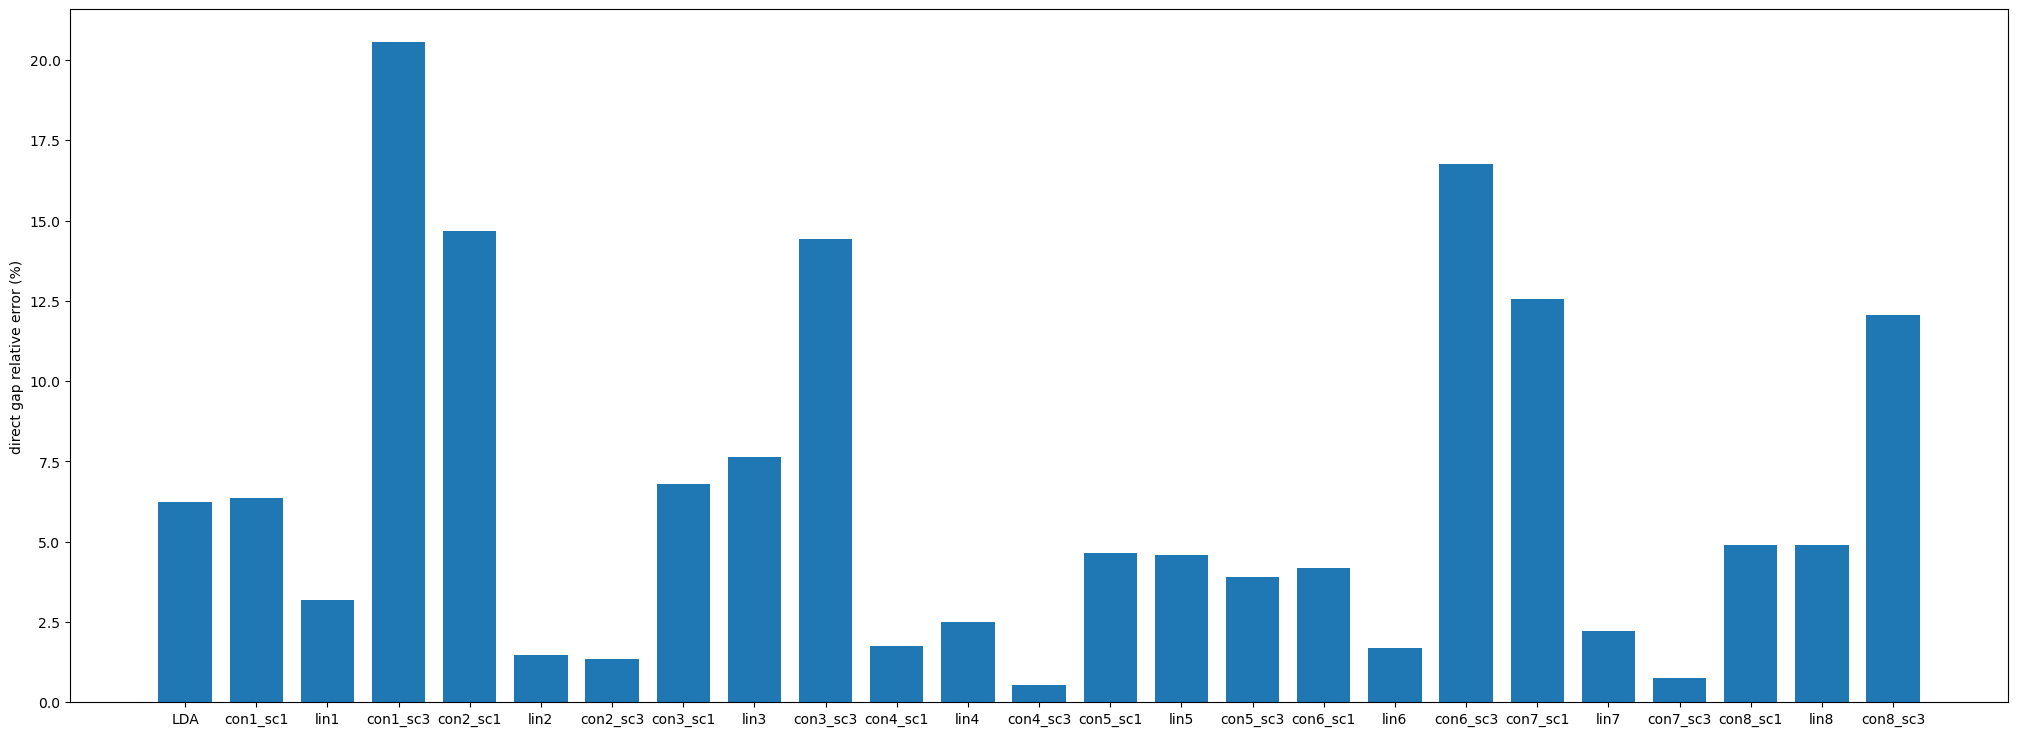

In [9]:
plt.figure(figsize=(25,9))
plt.bar(si_analyse.direct_gaps_data.index,si_analyse.direct_gaps_data["Relative error (%)"], width=0.75)
plt.ylabel("direct gap relative error (%)")

## Error table 

In [10]:
si_analyse.dens_vxc_error_data.sort_values("density MaxARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con2_sc3,0.655304,2.677106,2.134488,9.713088,con
con4_sc3,1.066407,3.748378,2.517665,21.121912,con
con5_sc1,0.892951,3.973499,3.073661,33.595288,con
con4_sc1,0.539704,5.076031,2.314516,34.342437,con
lin4,0.993922,5.088436,2.758641,15.849763,lin
con7_sc3,1.087670,5.529501,2.699489,17.102637,con
lin2,1.013095,5.877652,3.024428,19.078135,lin
LDA,1.931372,7.316789,3.497577,50.542594,LDA
lin7,1.510200,8.792685,3.909131,25.681183,lin
con7_sc1,4.049136,9.921071,7.371227,21.980964,con


Text(0, 0.5, 'MeanARE(%)')

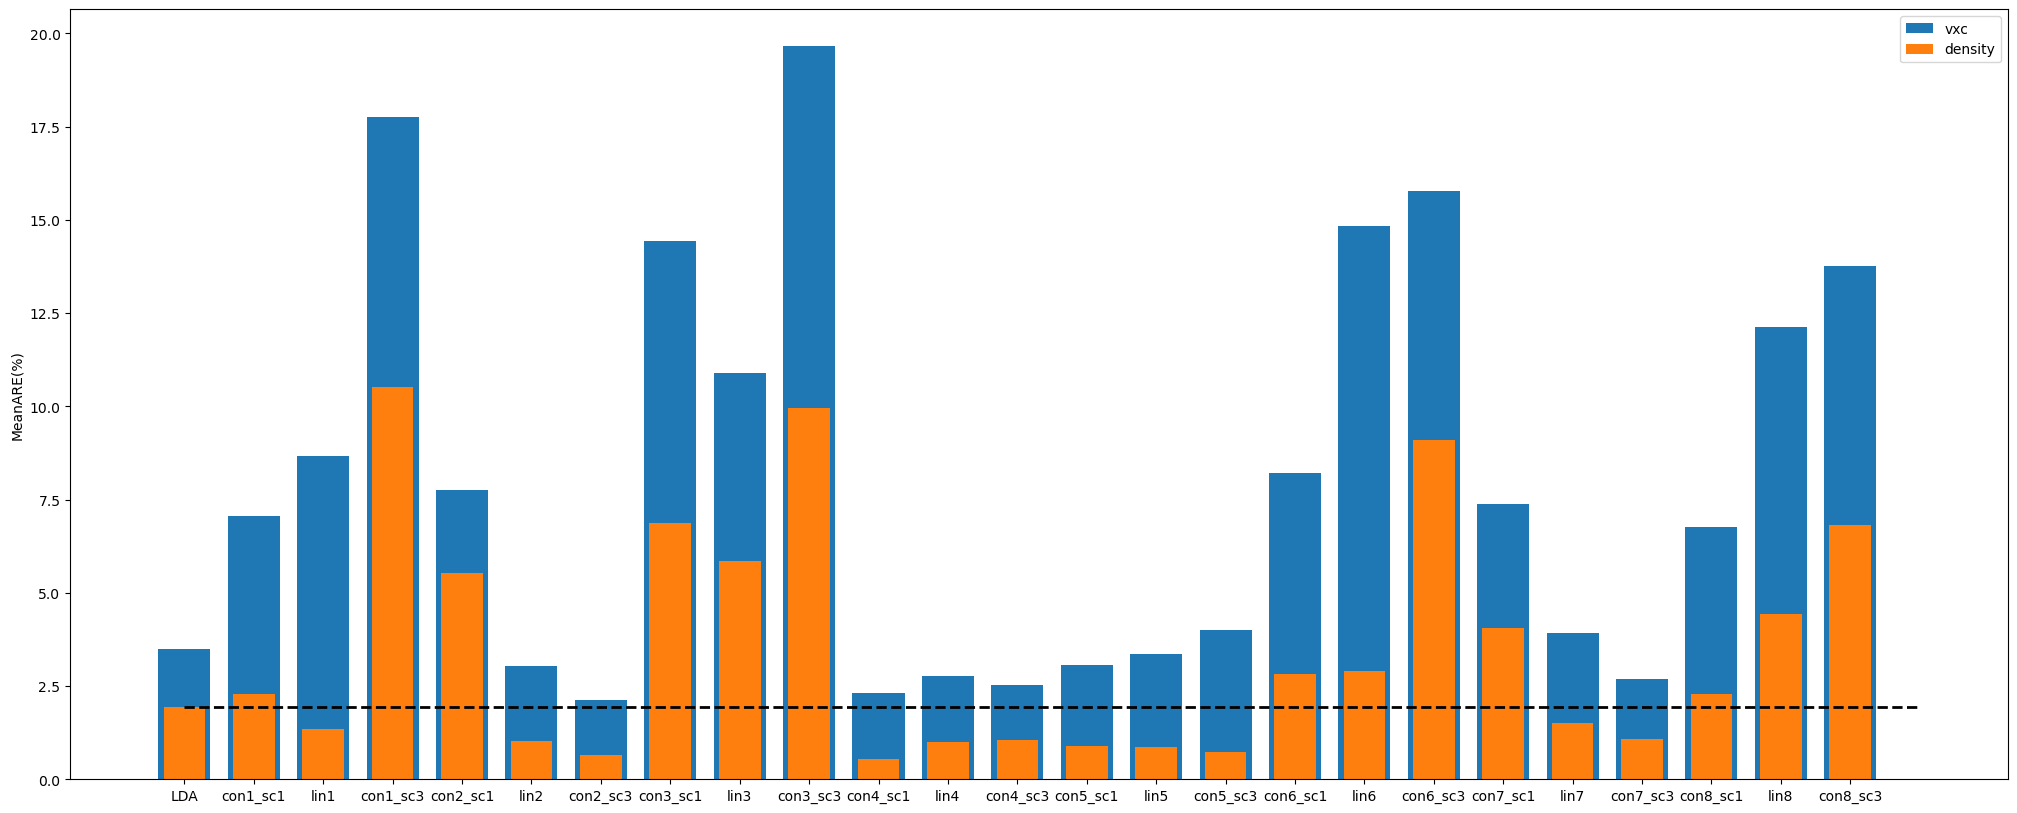

In [11]:
plt.figure(figsize=(25,10))
plt.bar(si_analyse.dens_vxc_error_data.index,si_analyse.dens_vxc_error_data["vxc MeanARE(%)"], width=0.75, label="vxc")
plt.bar(si_analyse.dens_vxc_error_data.index,si_analyse.dens_vxc_error_data["density MeanARE(%)"], width=0.6, label="density")
plt.hlines(si_analyse.dens_vxc_error_data.loc["LDA","density MeanARE(%)"],0,25, ls="dashed", color="black", lw=2)
plt.legend()
plt.ylabel("MeanARE(%)")

Text(0, 0.5, 'MaxARE(%)')

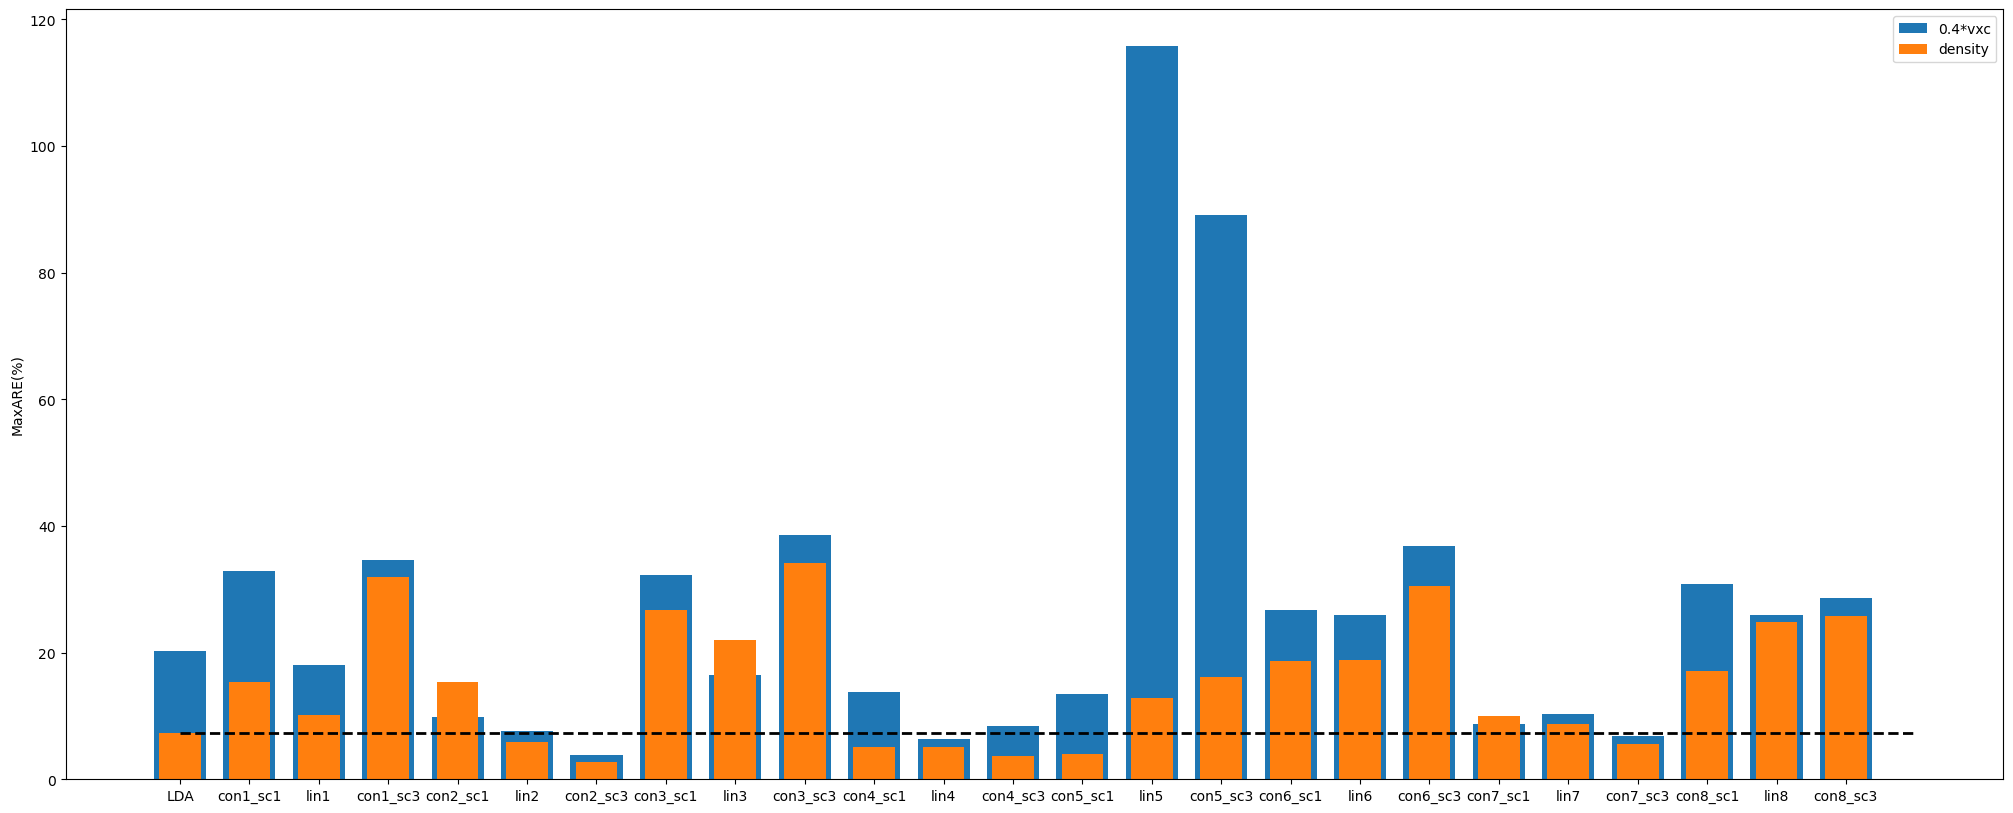

In [12]:
plt.figure(figsize=(25,10))

plt.bar(si_analyse.dens_vxc_error_data.index,0.4*si_analyse.dens_vxc_error_data["vxc MaxARE(%)"], width=0.75, label="0.4*vxc")
plt.bar(si_analyse.dens_vxc_error_data.index,si_analyse.dens_vxc_error_data["density MaxARE(%)"], width=0.6, label="density", color="C1")
plt.hlines(si_analyse.dens_vxc_error_data.loc["LDA","density MaxARE(%)"],0,25, ls="dashed", color="black", lw=2)

plt.legend()
plt.ylabel("MaxARE(%)")

In [18]:
si_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)")[:7]

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con2_sc3,0.655304,2.677106,2.134488,9.713088,con
lin4,0.993922,5.088436,2.758641,15.849763,lin
con7_sc3,1.087670,5.529501,2.699489,17.102637,con
lin2,1.013095,5.877652,3.024428,19.078135,lin
con4_sc3,1.066407,3.748378,2.517665,21.121912,con
con7_sc1,4.049136,9.921071,7.371227,21.980964,con
con2_sc1,5.532618,15.381459,7.767175,24.679106,con


## Map density vxc 

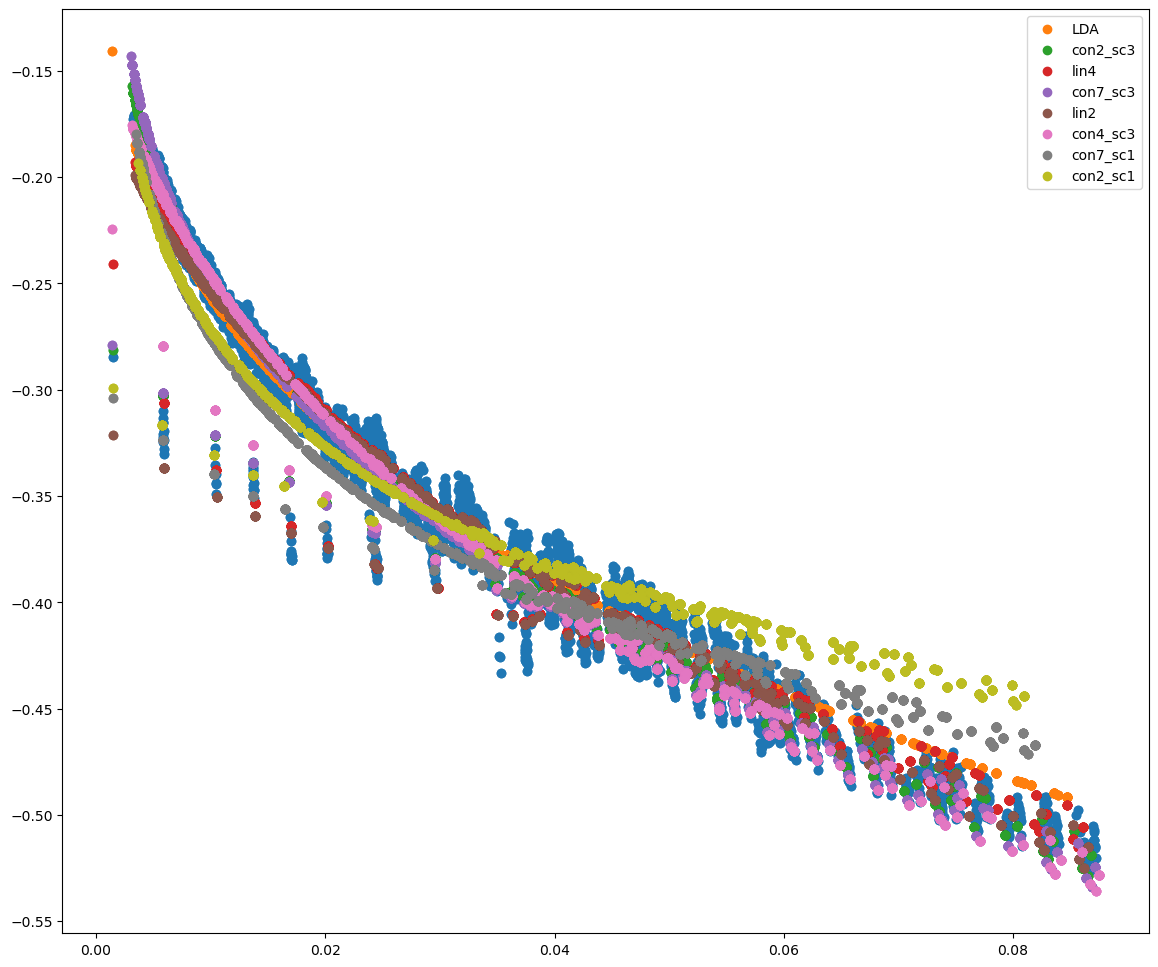

In [14]:
plt.figure(figsize=(12*1.168,12))
plt.scatter(si_analyse.newdens_QMC, si_analyse.vxc_qmc)
plt.scatter(si_analyse.dict["LDA"]["dens"], si_analyse.dict["LDA"]["vxc"], label="LDA") 
for func in si_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)").index[:7]: 
    plt.scatter(si_analyse.dict[func]["dens"], si_analyse.dict[func]["vxc"], label=func)     

plt.legend()

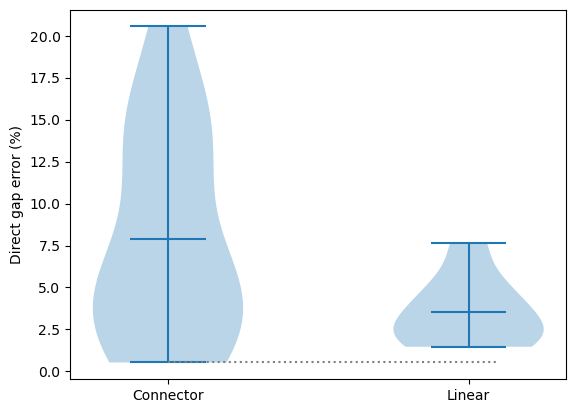

In [15]:
df_g=si_analyse.direct_gaps_data 
vlist= [df_g[df_g["type"]=="con"]["Relative error (%)"],
        df_g[df_g["type"]=="lin"]["Relative error (%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Direct gap error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(df_g[df_g["type"]=="con"]["Relative error (%)"].min(),1,2.1, color="grey", ls="dotted")

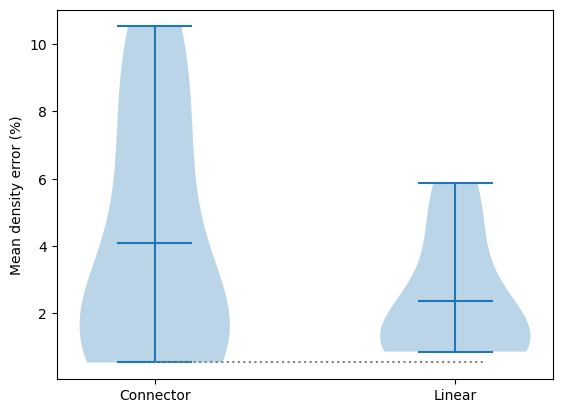

In [16]:
vlist= [si_analyse.dens_vxc_error_data[si_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"],
        si_analyse.dens_vxc_error_data[si_analyse.dens_vxc_error_data["type"]=="lin"]["density MeanARE(%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Mean density error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(si_analyse.dens_vxc_error_data[si_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"].min(),1,2.1, color="grey", ls="dotted")

# NaCl 

In [17]:
# update results 
#! rsync -av --delete ara:/home/me36sin/fxc_conn_article/NaCl/calculations/runs/updated_code/all_tab-con/*con*.npz .
#! rsync -av --delete ara:/home/me36sin/fxc_conn_article/NaCl/calculations/runs/updated_code/all_tab-lin/*lin*.npz .

receiving incremental file list
nacl_con1_sc1.npz
nacl_con1_sc3.npz
nacl_con2_sc1.npz
nacl_con2_sc3.npz
nacl_con3_sc1.npz
nacl_con3_sc3.npz
nacl_con4_sc1.npz
nacl_con4_sc3.npz
nacl_con5_sc1.npz
nacl_con5_sc3.npz
nacl_con6_sc1.npz
nacl_con6_sc3.npz
nacl_con7_sc1.npz
nacl_con7_sc3.npz
nacl_con8_sc1.npz
nacl_con8_sc3.npz

sent 460,694 bytes  received 388,515,215 bytes  1,448,699.85 bytes/sec
total size is 415,886,784  speedup is 1.07
receiving incremental file list
nacl_lin1_sc3.npz
nacl_lin2_sc3.npz
nacl_lin3_sc3.npz
nacl_lin4_sc3.npz
nacl_lin5_sc3.npz
nacl_lin6_sc3.npz
nacl_lin7_sc3.npz
nacl_lin8_sc3.npz

sent 317,595 bytes  received 286,013,519 bytes  1,347,440.54 bytes/sec
total size is 289,994,464  speedup is 1.01


In [18]:
nacl_analyse = analyzer(mat="nacl", qmc_file="nacl_qmc_dens_vxc.csv")

In [19]:
nacl_analyse.dict["LDA"]= {"dens": np.genfromtxt("dens_PZ81_nacl.dat") , "direct_gap":2.55 , "vxc": np.genfromtxt("vxc_PZ81_nacl.dat")  }

In [30]:
for i in range(1,9):
    for sc in [1,3]:  
        try: nacl_analyse.add_to_dict_from_npz(f"nacl_lin{i}_sc{sc}.npz", label=f"lin{i}")
        except : pass
        nacl_analyse.add_to_dict_from_npz(f"nacl_con{i}_sc{sc}.npz", label=f"con{i}_sc{sc}")
    

list(nacl_analyse.dict.keys())

for nacl_con1_sc1.npz number of iterations is  50
diff on density for the last iteration: 1.46e-06
The direct gap is 4.5608 ev | QMC = 5.25 eV
for nacl_lin1_sc3.npz number of iterations is  50
diff on density for the last iteration: 3.76e-04
The direct gap is 3.7678 ev | QMC = 5.25 eV
for nacl_con1_sc3.npz number of iterations is  50
diff on density for the last iteration: 1.16e-05
The direct gap is 4.9138 ev | QMC = 5.25 eV
for nacl_con2_sc1.npz number of iterations is  42
diff on density for the last iteration: 2.74e-05
The direct gap is 4.3006 ev | QMC = 5.25 eV
for nacl_lin2_sc3.npz number of iterations is  45
diff on density for the last iteration: 5.00e-06
The direct gap is 4.2263 ev | QMC = 5.25 eV
for nacl_con2_sc3.npz number of iterations is  36
diff on density for the last iteration: 1.82e-04
The direct gap is 4.8780 ev | QMC = 5.25 eV
for nacl_con3_sc1.npz number of iterations is  50
diff on density for the last iteration: 5.37e-07
The direct gap is 5.2221 ev | QMC = 5.25 eV

['LDA',
 'con1_sc1',
 'lin1',
 'con1_sc3',
 'con2_sc1',
 'con2_sc3',
 'con3_sc1',
 'lin3',
 'con3_sc3',
 'con4_sc1',
 'lin4',
 'con4_sc3',
 'con5_sc1',
 'lin5',
 'con5_sc3',
 'con6_sc1',
 'lin6',
 'con6_sc3',
 'con7_sc1',
 'lin7',
 'con7_sc3',
 'con8_sc1',
 'lin8',
 'con8_sc3',
 'lin2']

## Density error along the route 

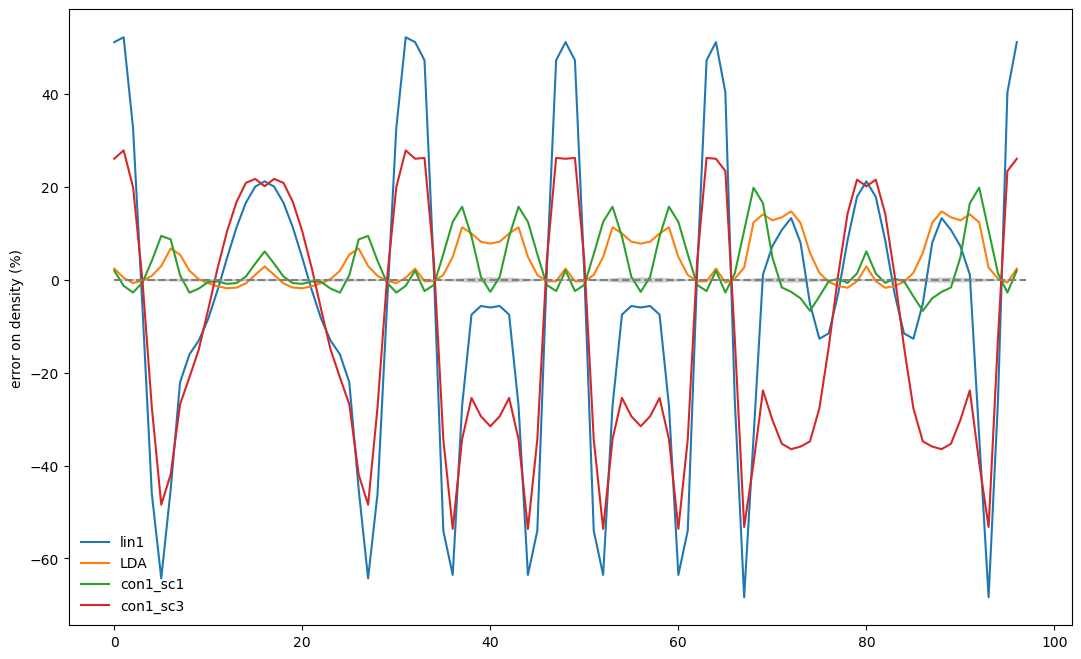

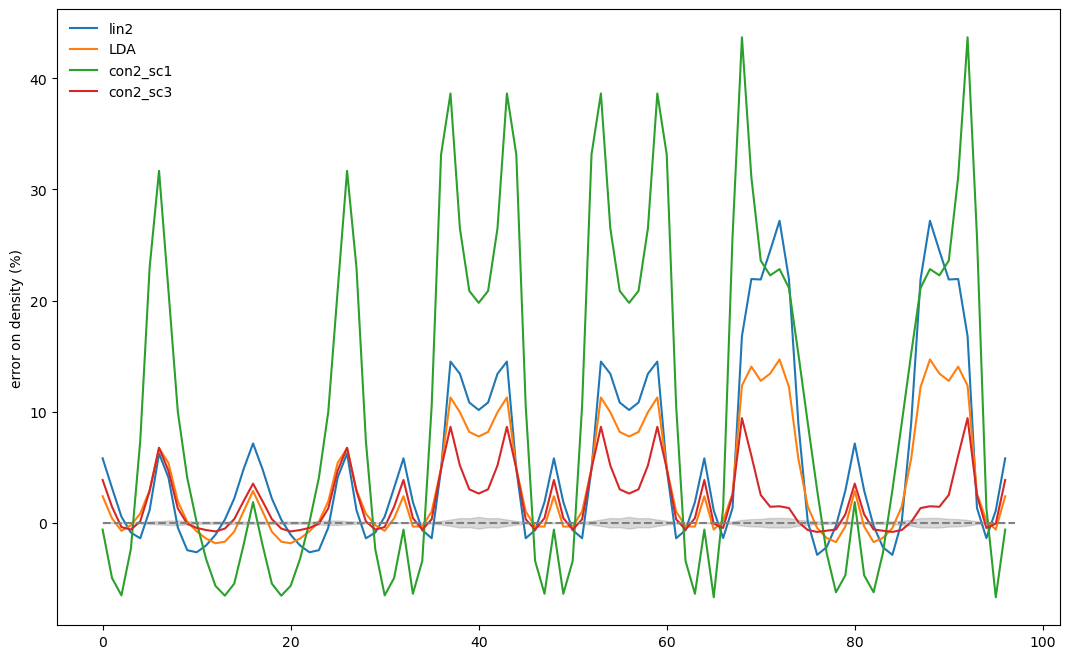

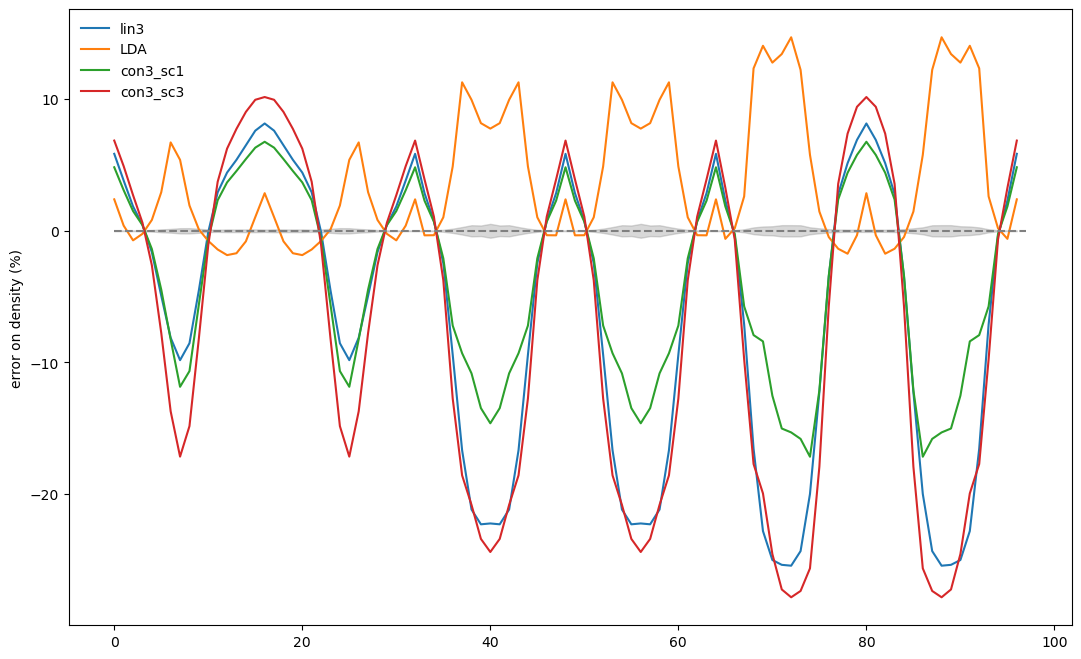

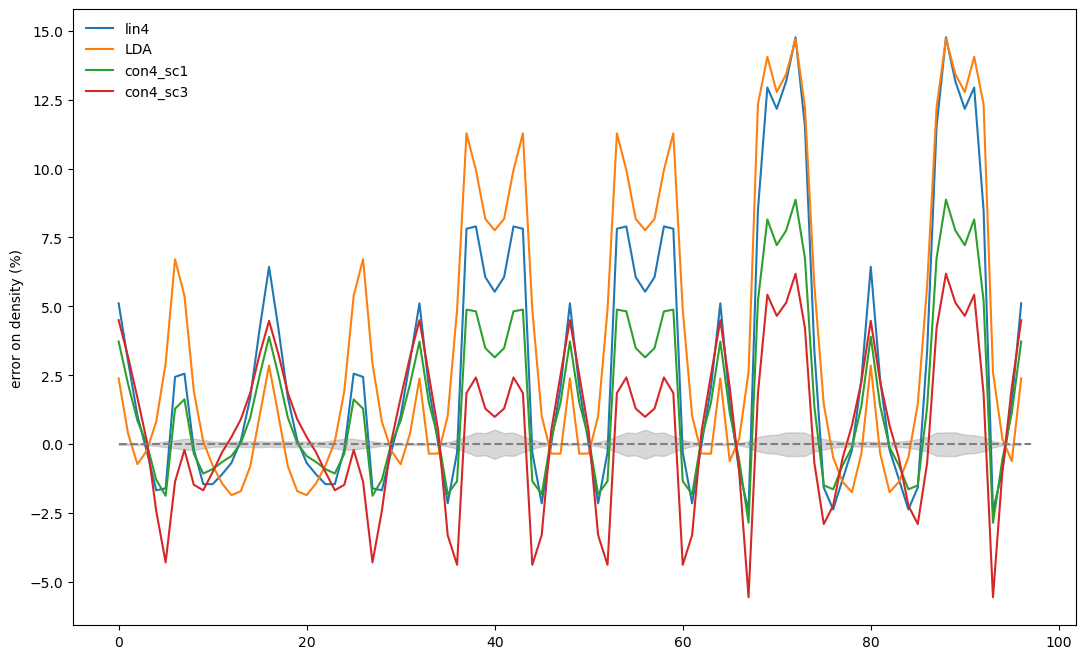

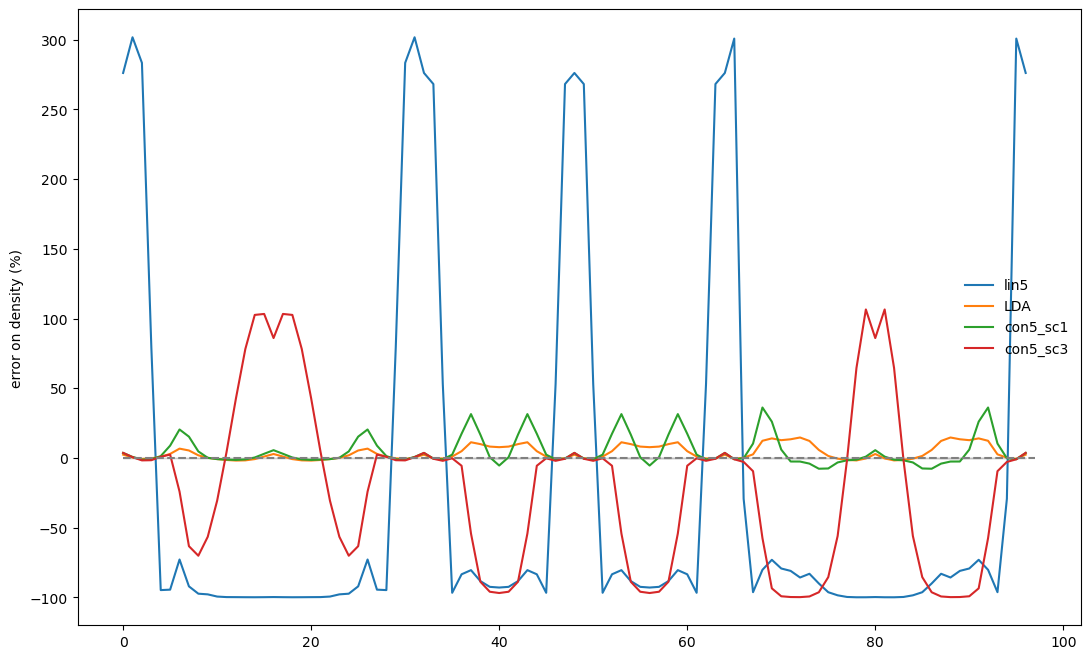

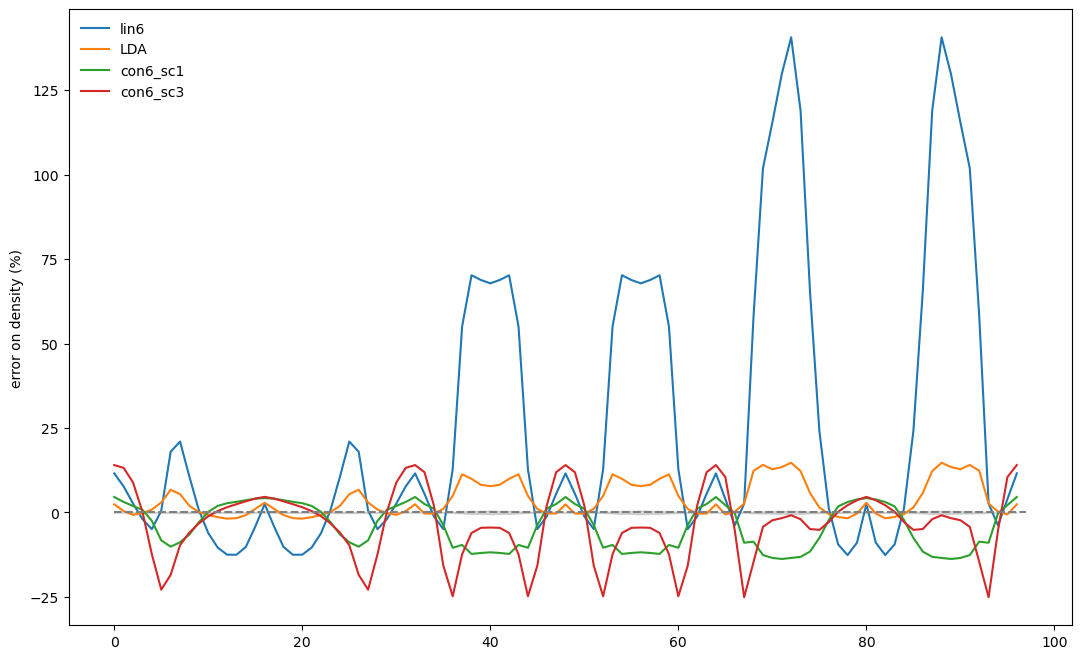

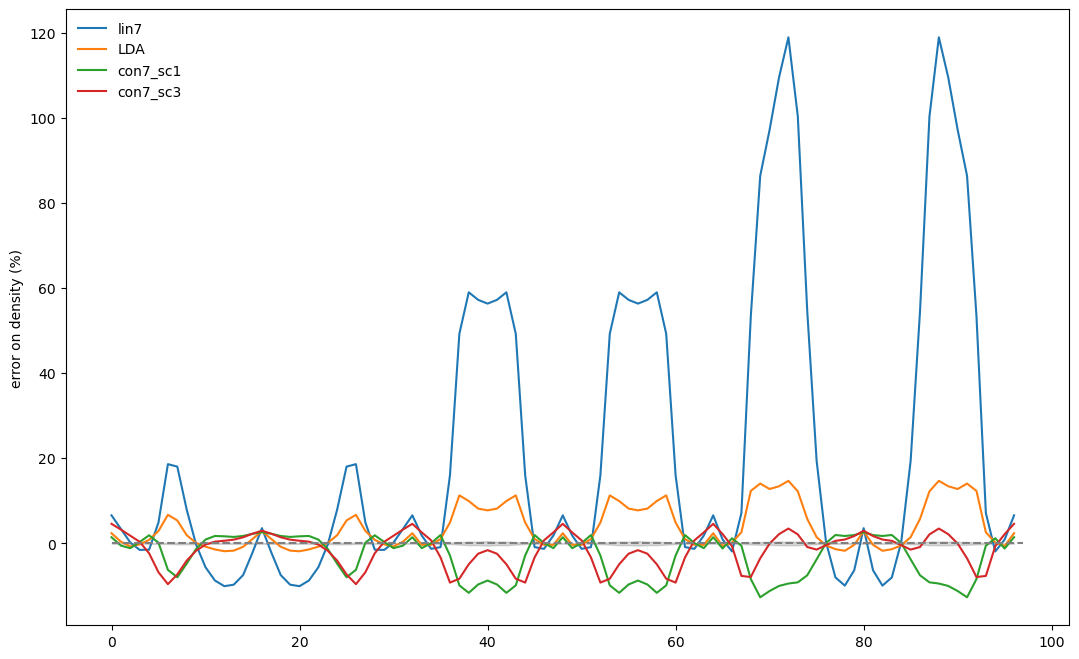

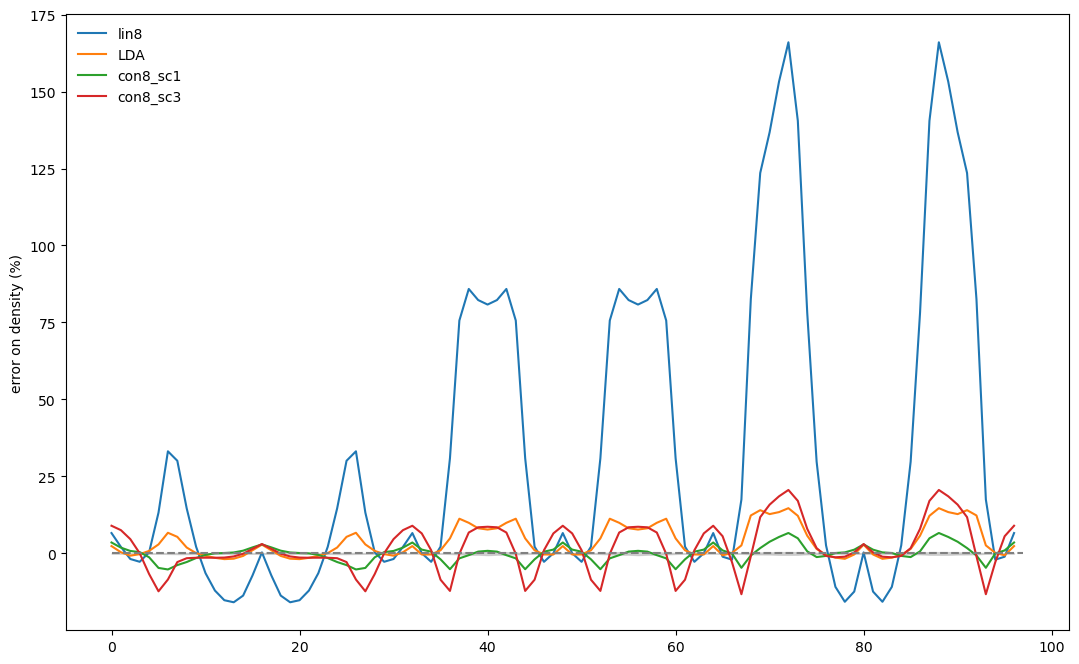

In [31]:
for i in range(1,9):
    plt.figure(figsize=(8*1.618,8))
    nacl_analyse.plot_diff_with_qmc([f"lin{i}","LDA", f"con{i}_sc1",f"con{i}_sc3"])

## KS direct gap 

In [32]:
nacl_analyse.get_stat() 
###
##
nacl_analyse.dens_vxc_error_data.loc[:,"type"]= [d[:3] for d in nacl_analyse.dens_vxc_error_data.index ]
nacl_analyse.direct_gaps_data.loc[:,"type"]= [d[:3] for d in nacl_analyse.direct_gaps_data.index ]
###
nacl_analyse.direct_gaps_data.sort_values("Relative error (%)")

,Direct KS Gap (ev),Relative error (%),type
con3_sc1,5.222134,0.530780,con
con7_sc3,5.318184,1.298747,con
con8_sc1,5.073026,3.370941,con
con3_sc3,5.445137,3.716894,con
con6_sc3,4.983832,5.069867,con
con6_sc1,5.537200,5.470473,con
con1_sc3,4.913808,6.403663,con
con2_sc3,4.878015,7.085425,con
con4_sc3,4.838299,7.841931,con
lin3,5.667694,7.956076,lin


| $n_{0,{\bf r}}$ | $n^{{\bf r}'}_{\bf r} $        |  $ n^h_{{\bf r}}$|$ n^h_{0{\bf r}}$ | Linear | Connector |
|-----------------|--------------------------------|-------------------|-----------------|--------|-----------|
| $n^{\rm av}$    | $n^{\rm av}$                   | -sc  | $n^{\rm av}$ | lin1      | con1   | 
| $n^{\rm av}$    | $(n({\bf r}')+ n^{\rm av})/2 $ | sc| $n^{\rm av}$ | lin2 | con2                   |
| $n({\bf r})$    | $ (n^{\rm av}+n({\bf r})/2$    | sc| $n({\bf r})$  |lin3  | con3  |
| $n({\bf r}) $   | $ (n({\bf r}')+ n({\bf r}))/2$ | sc | $n({\bf r})$  |lin4 | con4 |
| $n({\bf r}) $   | $ n({\bf r})$                  | sc | $n({\bf r})$ |lin5 | con5|
| $n^M$           | $(n^{\rm av}+n^M)/2$           | sc |$n^M$ |lin6 | con6|
| $n^M$           | $(n({\bf r}')+n^M)/2$          | sc | $n^M$ |lin7  | con7 | 
| $n^M$           | $n^M$                          |  sc| $n^M$|lin8 | con8| 

In [33]:
nacl_analyse.dens_vxc_error_data.sort_values("density MaxARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con4_sc3,1.882036,6.195340,8.687075,144.427725,con
con8_sc1,1.575154,6.644084,10.583507,144.376989,con
con4_sc1,2.258128,8.945481,8.649583,132.125397,con
con7_sc3,3.062575,10.112988,11.417305,146.473495,con
con2_sc3,2.373535,10.399425,10.027462,121.539386,con
con7_sc1,5.605288,13.029517,9.786128,118.198815,con
con6_sc1,7.782102,13.905373,15.699623,183.254343,con
lin4,3.634371,14.761400,10.782329,152.678428,lin
LDA,4.951871,15.232345,9.397969,109.908756,LDA
con3_sc1,9.162501,17.330188,25.450051,183.414945,con


Text(0, 0.5, 'direct gap relative error (%)')

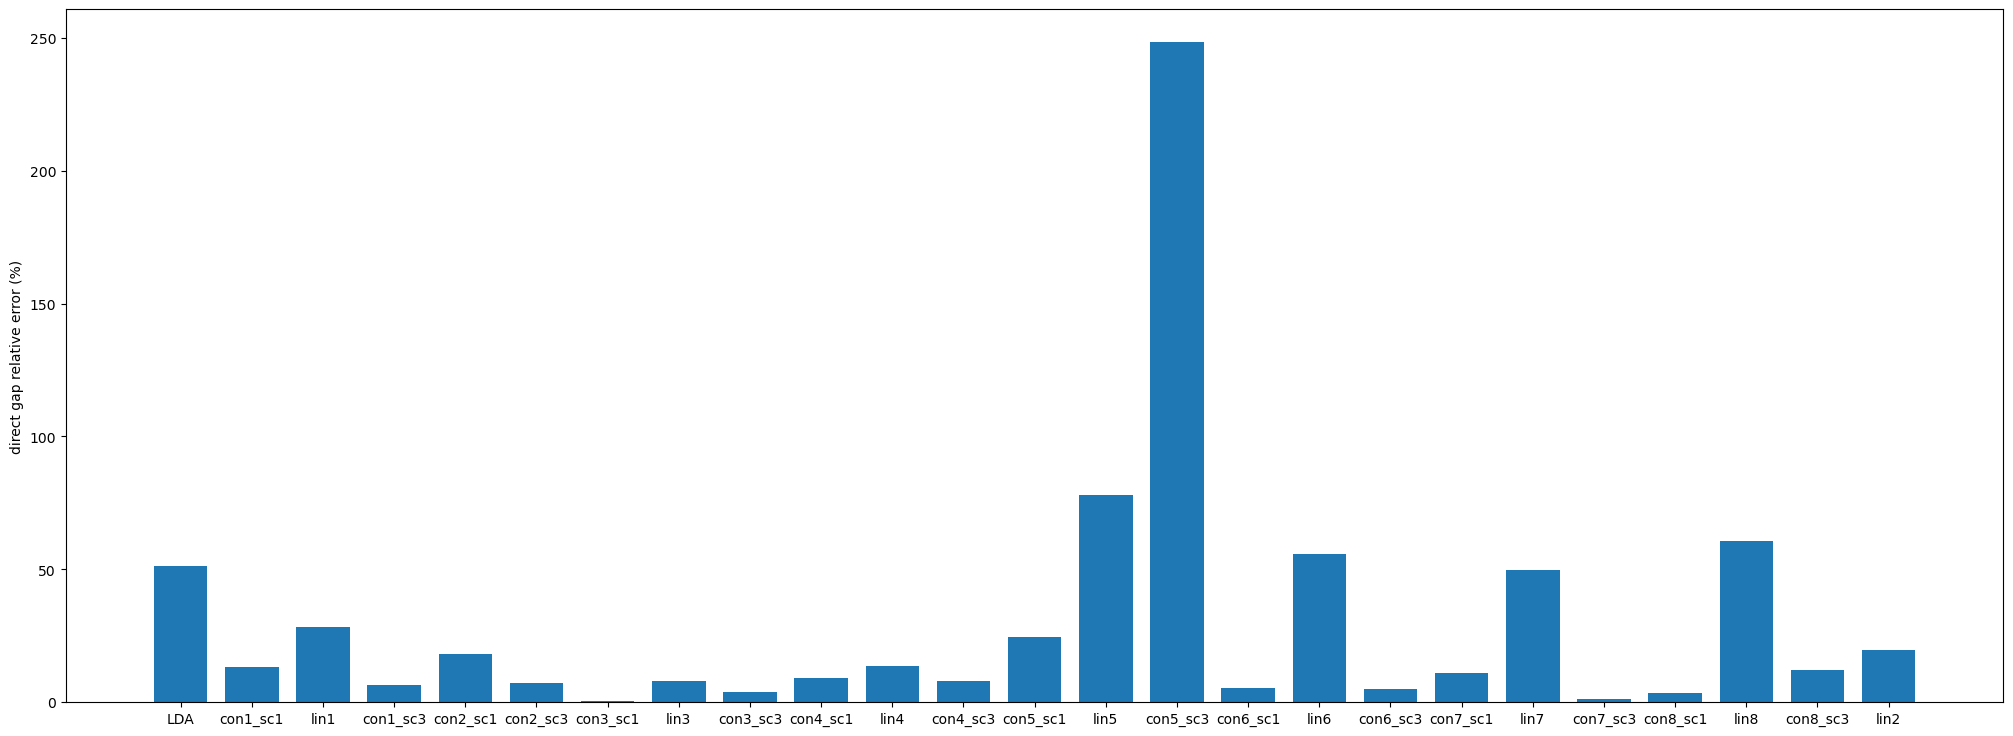

In [34]:
plt.figure(figsize=(25,9))
plt.bar(nacl_analyse.direct_gaps_data.index,nacl_analyse.direct_gaps_data["Relative error (%)"], width=0.75)
plt.ylabel("direct gap relative error (%)")

## Error table 

In [36]:
nacl_analyse.dens_vxc_error_data.sort_values("density MeanARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con8_sc1,1.575154,6.644084,10.583507,144.376989,con
con4_sc3,1.882036,6.195340,8.687075,144.427725,con
con4_sc1,2.258128,8.945481,8.649583,132.125397,con
con2_sc3,2.373535,10.399425,10.027462,121.539386,con
con7_sc3,3.062575,10.112988,11.417305,146.473495,con
lin4,3.634371,14.761400,10.782329,152.678428,lin
con1_sc1,4.549292,21.880033,25.323379,122.583411,con
con8_sc3,4.854463,20.610937,18.116765,200.678173,con
LDA,4.951871,15.232345,9.397969,109.908756,LDA
con7_sc1,5.605288,13.029517,9.786128,118.198815,con


Text(0, 0.5, 'MeanARE(%)')

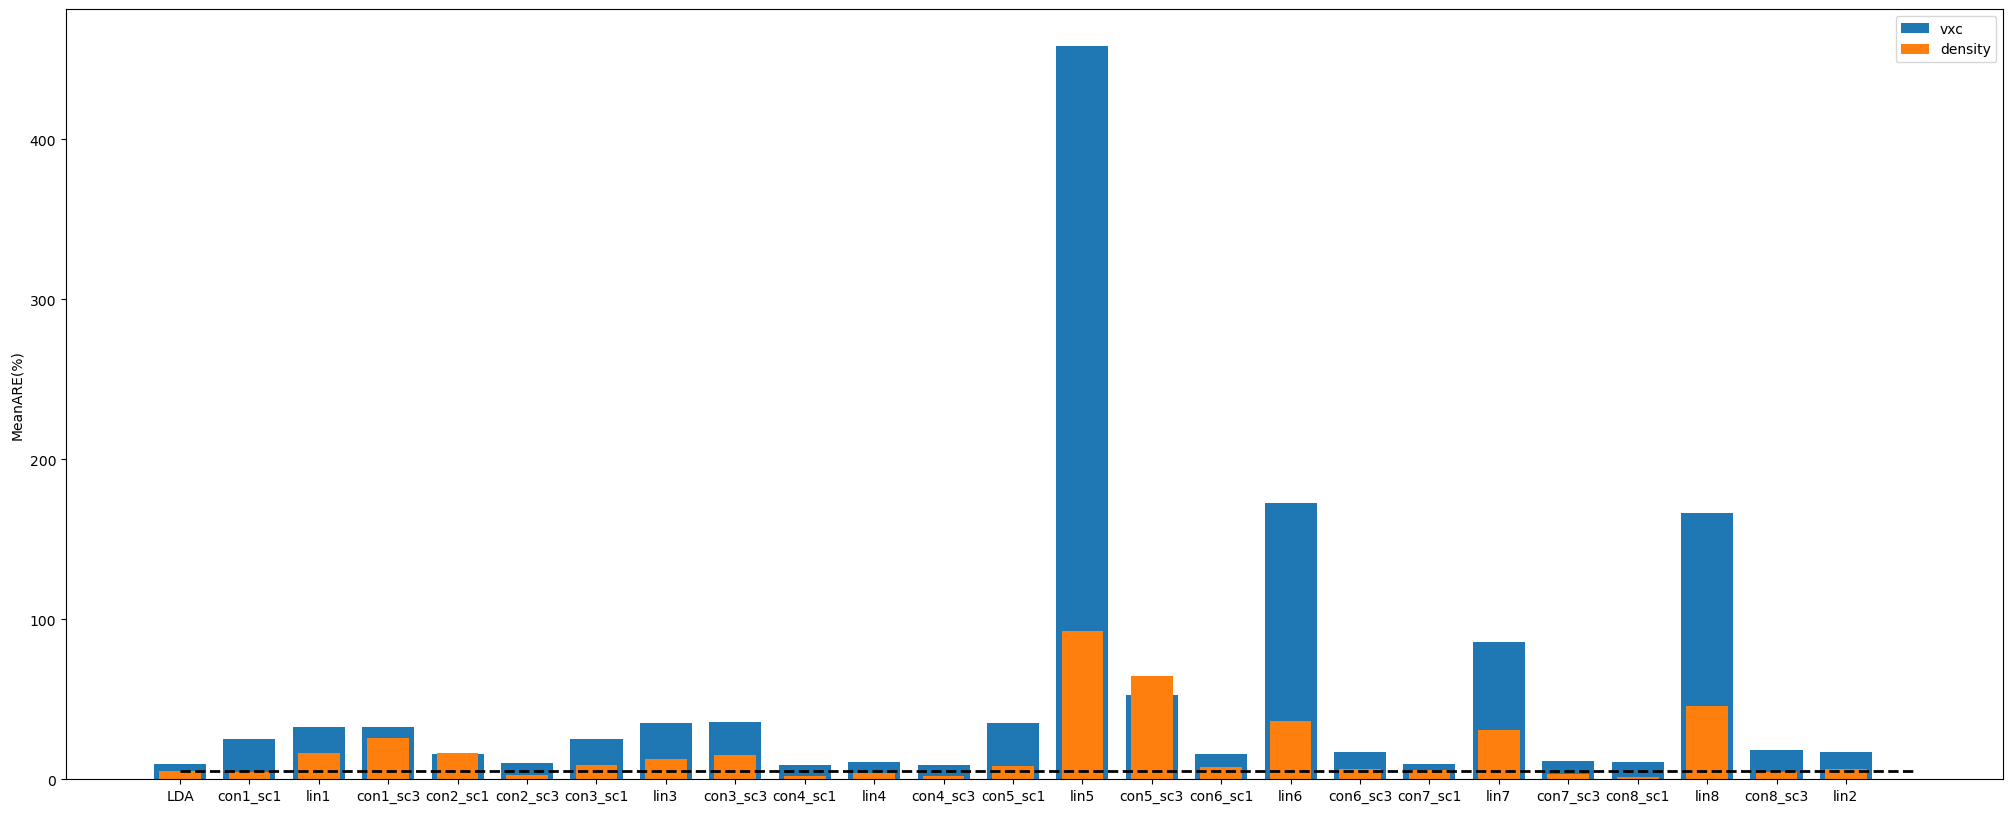

In [37]:
plt.figure(figsize=(25,10))
plt.bar(nacl_analyse.dens_vxc_error_data.index,nacl_analyse.dens_vxc_error_data["vxc MeanARE(%)"], width=0.75, label="vxc")
plt.bar(nacl_analyse.dens_vxc_error_data.index,nacl_analyse.dens_vxc_error_data["density MeanARE(%)"], width=0.6, label="density")
plt.hlines(nacl_analyse.dens_vxc_error_data.loc["LDA","density MeanARE(%)"],0,25, ls="dashed", color="black", lw=2)
plt.legend()
plt.ylabel("MeanARE(%)")

Text(0, 0.5, 'MaxARE(%)')

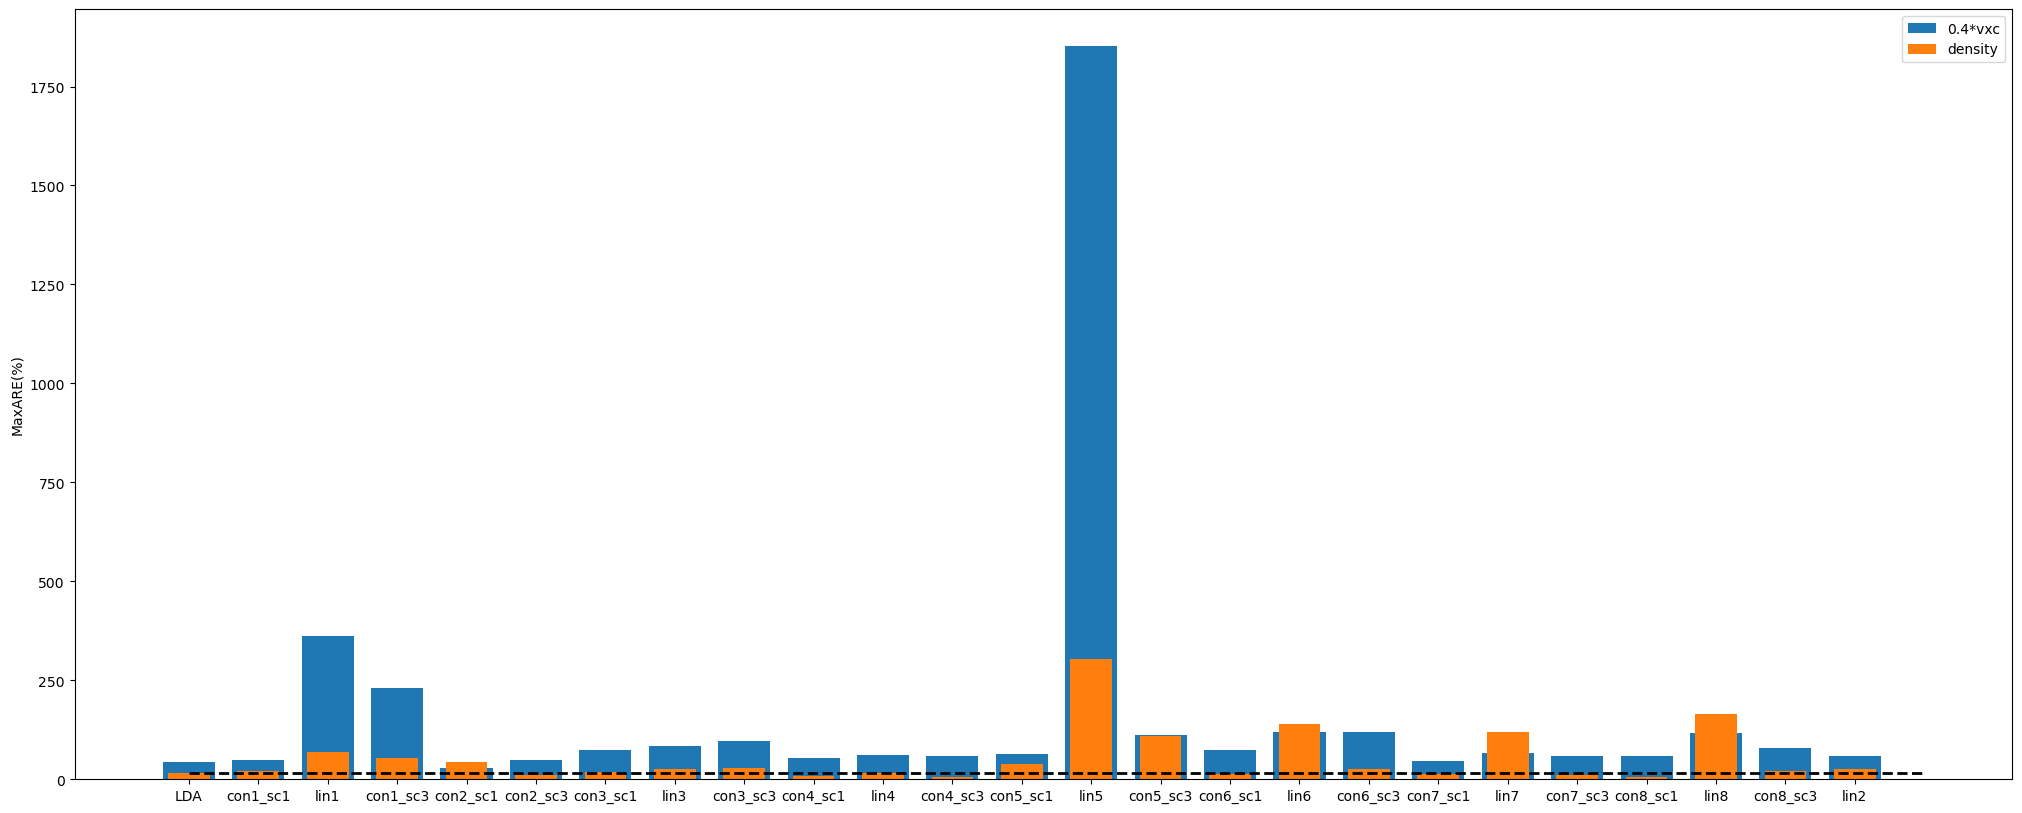

In [38]:
plt.figure(figsize=(25,10))

plt.bar(nacl_analyse.dens_vxc_error_data.index,0.4*nacl_analyse.dens_vxc_error_data["vxc MaxARE(%)"], width=0.75, label="0.4*vxc")
plt.bar(nacl_analyse.dens_vxc_error_data.index,nacl_analyse.dens_vxc_error_data["density MaxARE(%)"], width=0.6, label="density", color="C1")
plt.hlines(nacl_analyse.dens_vxc_error_data.loc["LDA","density MaxARE(%)"],0,25, ls="dashed", color="black", lw=2)

plt.legend()
plt.ylabel("MaxARE(%)")

In [39]:
nacl_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)")[:7]

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con2_sc1,16.132619,44.659673,15.940581,73.137499,con
LDA,4.951871,15.232345,9.397969,109.908756,LDA
con7_sc1,5.605288,13.029517,9.786128,118.198815,con
con2_sc3,2.373535,10.399425,10.027462,121.539386,con
con1_sc1,4.549292,21.880033,25.323379,122.583411,con
con4_sc1,2.258128,8.945481,8.649583,132.125397,con
con8_sc1,1.575154,6.644084,10.583507,144.376989,con


## Map density vxc 

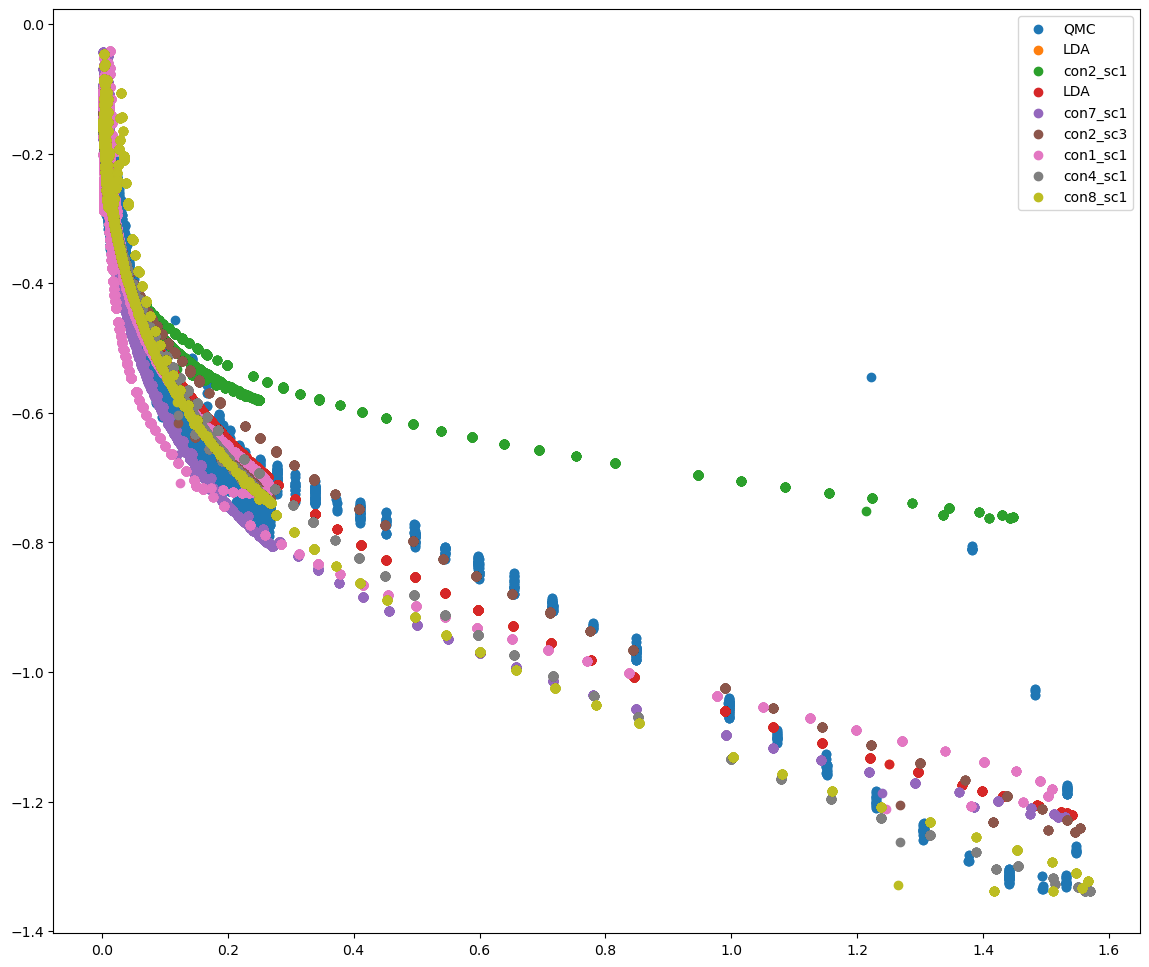

In [40]:
plt.figure(figsize=(12*1.168,12))
plt.scatter(nacl_analyse.newdens_QMC, nacl_analyse.vxc_qmc,label="QMC")
plt.scatter(nacl_analyse.dict["LDA"]["dens"], nacl_analyse.dict["LDA"]["vxc"], label="LDA") 
for func in nacl_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)").index[:7]: 
    plt.scatter(nacl_analyse.dict[func]["dens"], nacl_analyse.dict[func]["vxc"], label=func)     

plt.legend()

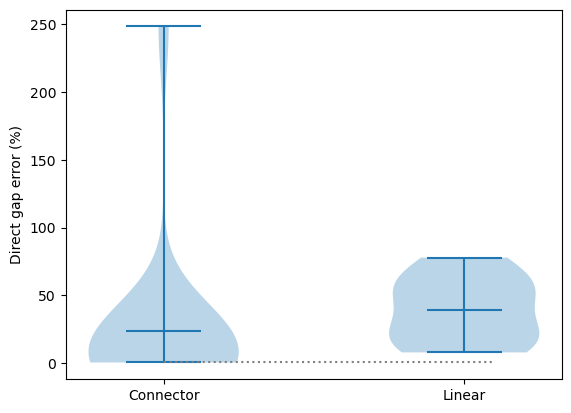

In [41]:
df_g=nacl_analyse.direct_gaps_data 
vlist= [df_g[df_g["type"]=="con"]["Relative error (%)"],
        df_g[df_g["type"]=="lin"]["Relative error (%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Direct gap error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(df_g[df_g["type"]=="con"]["Relative error (%)"].min(),1,2.1, color="grey", ls="dotted")

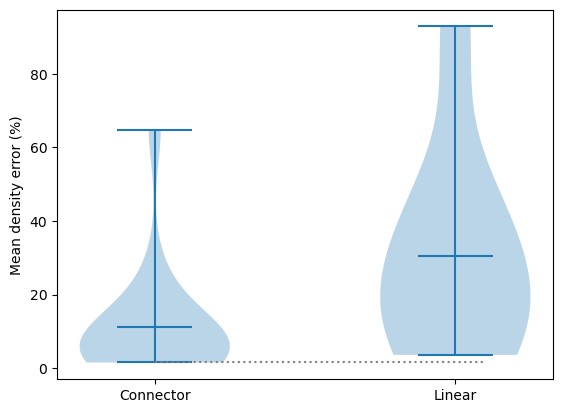

In [42]:
vlist= [nacl_analyse.dens_vxc_error_data[nacl_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"],
        nacl_analyse.dens_vxc_error_data[nacl_analyse.dens_vxc_error_data["type"]=="lin"]["density MeanARE(%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Mean density error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(nacl_analyse.dens_vxc_error_data[nacl_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"].min(),1,2.1, color="grey", ls="dotted")